# Exploratory Data Analysis

In [1]:
# import the libraries
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Load the data
df = pd.read_csv('data/museum_data.csv')
df

,MuseumName,Address,Continent,SubRegion,Country,CityUS,StateUS,Rating,ReviewCount,FeatureCount,...,take pictures,admission,great place to learn,enjoyed our visit,special exhibitions,suggested donation,displays,old west,learn something,life size
0,The Field Museum,"1400 S Lake Shore Dr, Chicago, IL 60605-2827",Americas,Northern America,USA,Chicago,IL,4.50,5500,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Smithsonian National Museum of Natural History,"10th Street and Constitution Ave, Washington D...",Americas,Northern America,USA,Washington DC,DC,4.50,7640,7,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,American Museum of Natural History,"79th Street and Central Park West, New York Ci...",Americas,Northern America,USA,New York City,NY,4.50,13992,11,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
3,National Naval Aviation Museum,"1750 Radford Blvd, NAS Pensacola, Pensacola, F...",Americas,Northern America,USA,Pensacola,FL,5.00,4057,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,National Mississippi River Museum & Aquarium,"350 E 3rd St, Port of Dubuque, Dubuque, IA 520...",Americas,Northern America,USA,Dubuque,IA,4.50,1036,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,The Hershey Story,"63 W Chocolate Ave, Hershey, PA 17033-1502",Americas,Northern America,USA,Hershey,PA,4.50,1127,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,Philadelphia Museum of Art,"2600 Benjamin Franklin Pkwy, Philadelphia, PA ...",Americas,Northern America,USA,Philadelphia,PA,4.50,4713,7,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,The Ringling,"5401 Bay Shore Rd, Sarasota, FL 34243-2161",Americas,Northern America,USA,Sarasota,FL,4.50,4450,2,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Balboa Park,"1549 El Prado, San Diego, CA 92101-1660",Americas,Northern America,USA,San Diego,CA,4.50,7453,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,The Getty Center,"1200 Getty Center Dr, Los Angeles, CA 90049-1657",Americas,Northern America,USA,Los Angeles,CA,5.00,9418,5,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
# check if any categories or tags are unused
df.loc[:,(df.sum()==0)].columns

Index(['Game & Entertainment Centers'], dtype='object')

In [4]:
# drop empty column
df.drop('Game & Entertainment Centers',inplace=True,axis=1)

In [5]:
# set some flags to define start and end columns of reviews, traveler types, museum categories and tags for data selection
first_review = 'Excellent'
last_review = 'Terrible'
first_traveler = 'Families'
last_traveler = 'Friends'
first_category = 'Ancient Ruins'
last_category = 'Zoos & Aquariums'
first_tag = 'on display'
last_tag = 'life size'

In [6]:
# add some calculated columns for more useful statistics

# compute ratios of review types out of the total reviews
df.loc[:,'%Excellent']= df['Excellent']/df.loc[:,first_review:last_review].sum(axis=1)*100
df.loc[:,'%Very Good']= df['Very Good']/df.loc[:,first_review:last_review].sum(axis=1)*100
df.loc[:,'%Average']= df['Average']/df.loc[:,first_review:last_review].sum(axis=1)*100
df.loc[:,'%Poor']= df['Poor']/df.loc[:,first_review:last_review].sum(axis=1)*100
df.loc[:,'%Terrible']= df['Terrible']/df.loc[:,first_review:last_review].sum(axis=1)*100

# compute ratios of traveler types out of the total travelers
df.loc[:,'%Families']= df['Families']/df.loc[:,first_traveler:last_traveler].sum(axis=1)*100
df.loc[:,'%Couples']= df['Couples']/df.loc[:,first_traveler:last_traveler].sum(axis=1)*100
df.loc[:,'%Solo']= df['Solo']/df.loc[:,first_traveler:last_traveler].sum(axis=1)*100
df.loc[:,'%Business']= df['Business']/df.loc[:,first_traveler:last_traveler].sum(axis=1)*100
df.loc[:,'%Friends']= df['Friends']/df.loc[:,first_traveler:last_traveler].sum(axis=1)*100

# compute relative ranking based on the number of things to do, and inverse (higher value = more popular)
df['RelativeRank'] = df['Rank']/df['TotalThingsToDo']
df['InvRelativeRank'] = 1/df['RelativeRank']

In [7]:
# set some flags to define start and end columns of calculated columns %reviews and %traveler types
first_review_percent = '%Excellent'
last_review_percent = '%Terrible'
first_traveler_percent = '%Families'
last_traveler_percent = '%Friends'

In [8]:
# define some column lists for data selection

# define lists of review type and traveler type columns
reviews = list(df.loc[:,first_review:last_review])
reviews_percent = list(df.loc[:,first_review_percent:last_review_percent])
travelers = list(df.loc[:,first_traveler:last_traveler])
travelers_percent = list(df.loc[:,first_traveler_percent:last_traveler_percent])

# define lists of 15 most frequent museum categories and tags
top15categories = list(df.loc[:,first_category:last_category].sum().sort_values(ascending=False).head(15).index)
top15tags = list(df.loc[:,first_tag:last_tag].sum().sort_values(ascending=False).head(15).index)

## Data Perspective

4.50    1159
4.00     282
5.00     119
3.50      31
2.50       1
3.00       1
Name: Rating, dtype: int64


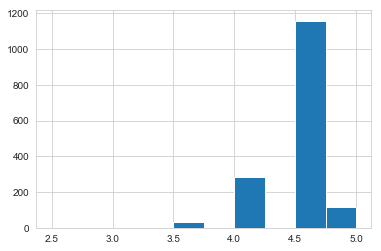

In [9]:
# Analyze average rating distribution

print(df['Rating'].value_counts())

# histogram
plt.hist(df['Rating'])
plt.show()

The average rating of most museums is fairly high, with the majority seeing a rating of 4.5.

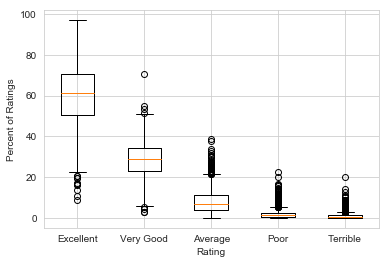

In [10]:
# plot %s of ratings per rating type
values = []

for review in reviews_percent:
    values.append(list(df[review].values))
    
plt.boxplot(values)
plt.xticks(range(1,6), reviews)
plt.ylabel('Percent of Ratings')
plt.xlabel('Rating')
plt.show()

Overall, it appears as though most people give a generous rating (or, most museums are pretty good). This is consistent with the distribution of average overall rating.

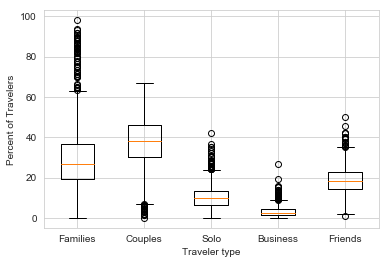

In [11]:
# plot %s of travelers per traveler type
values = []

for traveler in travelers_percent:
        values.append(list(df[traveler]))


plt.boxplot(values)
plt.xticks(range(1,6), travelers)
plt.ylabel('Percent of Travelers')
plt.xlabel('Traveler type')
plt.show()

Overall, it looks like most people who visit museums go with their family or significant other (this makes sense to me, because most of the times I have visited museums have been in those contexts). Conversely, few solo and very few business travelers visit museums, except for a few museums. Several museums (likely, children's museums) see most of families as the overwhelming majority of visitors.

Americas    1051
Europe       403
Asia         118
Oceania       14
Africa         7
Name: Continent, dtype: int64


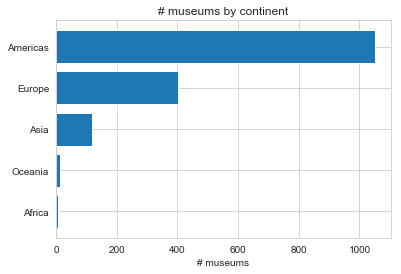

Northern America                   1019
Western Europe                      138
Northern Europe                     130
Southern Europe                      88
Eastern Asia                         48
Eastern Europe                       47
South-eastern Asia                   43
Latin America and the Caribbean      32
Western Asia                         17
Australia and New Zealand            14
Southern Asia                        10
Northern Africa                       4
Sub-Saharan Africa                    3
Name: SubRegion, dtype: int64


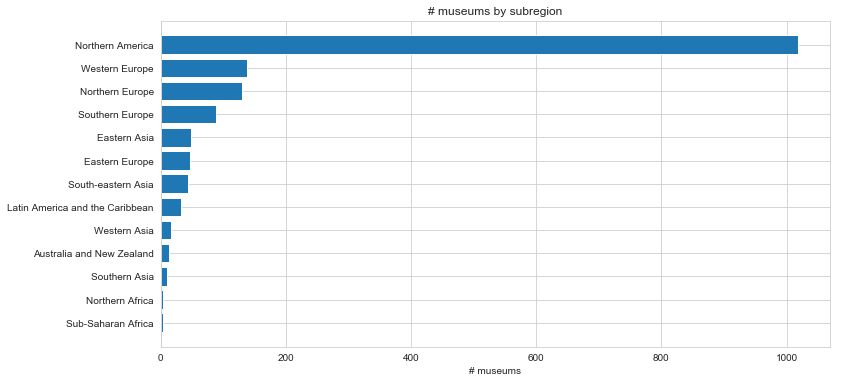

USA       1001
Canada      18
Name: Country, dtype: int64


In [12]:
# Analyze distribution of museums per subregion and continent

#continent
print(df['Continent'].value_counts())

# bar chart continents
plt.title('# museums by continent')
plt.xlabel('# museums')

labels = df['Continent'].value_counts().index
values = df['Continent'].value_counts().values

plt.barh(labels, values, align='center')
plt.gca().invert_yaxis()
plt.show()

# subregion
print(df['SubRegion'].value_counts())

# bar chart subregions
plt.figure(figsize=(12,6))
plt.title('# museums by subregion')
plt.xlabel('# museums')

labels = df['SubRegion'].value_counts().index
values = df['SubRegion'].value_counts().values

plt.barh(labels, values, align='center')
plt.gca().invert_yaxis()
plt.show()

# North America breakdown
print(df[df['SubRegion']=='Northern America']['Country'].value_counts())

Nearly two thirds of the museums in the dataset are located in the US. While the data is a subset of the total museums worldwide (only includes those listed on TripAdvisor), Wikipedia cites that of the ~55,000 museums worldwide, ~33,000 are in the US, which corresponds to the proportion in this dataset. About one quarter of the museums are located in Europe, about six percent in Asia, and only a handful in Australia/New Zealand and Africa.

count   1593.00
mean       1.00
std        2.15
min        0.00
25%        0.00
50%        0.00
75%        1.00
max       27.00
Name: FeatureCount, dtype: float64


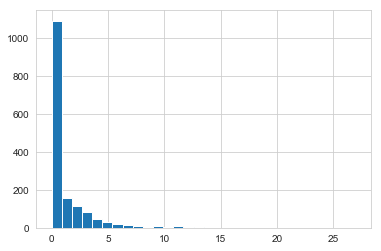

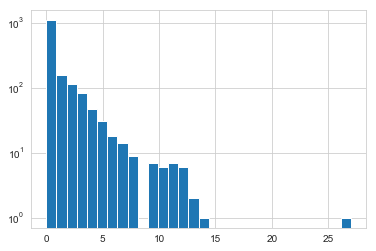

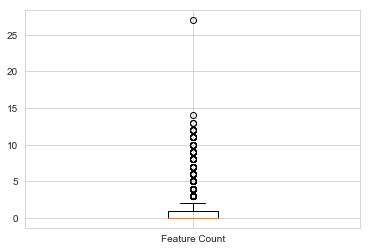

In [13]:
# analyze distribution of feature counts
print(df['FeatureCount'].describe())

# histogram
plt.hist(df['FeatureCount'], bins=30)
plt.show()

# histogram, log scale
plt.hist(df['FeatureCount'], log=True, bins=30)
plt.show()

# box plot
plt.boxplot(df['FeatureCount'])
plt.xticks([1], ['Feature Count'], rotation='horizontal')
plt.show()

In [14]:
# identify top outlier
df[df['FeatureCount'] == df['FeatureCount'].max()][['MuseumName','FeatureCount']]

,MuseumName,FeatureCount
1077,Hagia Sophia Museum / Church (Ayasofya),27


The data shows that about one quarter of the museums have been featured by Trip Advisor between 1-5 times, but the majority are never featured, and only a few are ever featured more than 10 times. The most-featured museum is the Hagia Sophia, which makes sense because it has been considered one of The Seven Wonders of the Medieval World.

count    1593.00
mean     1538.45
std      3914.91
min        32.00
25%       213.00
50%       507.00
75%      1253.00
max     63114.00
Name: ReviewCount, dtype: float64


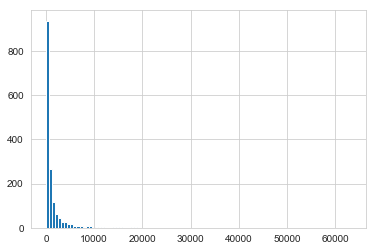

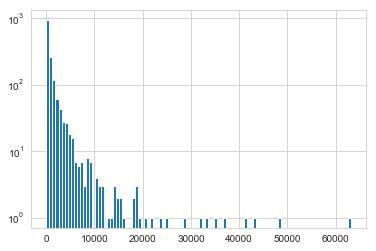

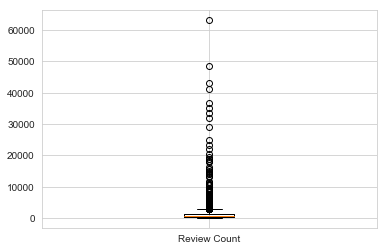

In [15]:
# analyze distribution of review counts
print(df['ReviewCount'].describe())

# histogram
plt.hist(df['ReviewCount'], bins=100)
plt.show()

# histogram, log scale
plt.hist(df['ReviewCount'], log=True, bins=100)
plt.show()

# box plot
plt.boxplot(df['ReviewCount'])
plt.xticks([1], ['Review Count'], rotation='horizontal')
plt.show()

In [16]:
# identify top outliers
df[df['ReviewCount']>30000][['MuseumName','Country','ReviewCount']].sort_values(by='ReviewCount', ascending=False)

,MuseumName,Country,ReviewCount
1056,Musee du Louvre,France,63114
1410,The National 9/11 Memorial & Museum,USA,48439
975,Musee d'Orsay,France,43037
1405,British Museum,England,41298
974,The Metropolitan Museum of Art,USA,36628
1120,Anne Frank House,The Netherlands,35239
1407,Van Gogh Museum,The Netherlands,33384
978,Prado National Museum,Spain,31900


The majority of museums have 5000 reviews or less, but very well-known museums world-wide have significantly more, likely indicating much higher attendance (and therefore, people who leave reviews) based on their popularity.

In [17]:
# compute correlation
df_corr = df.corr()
df_corr

,Rating,ReviewCount,FeatureCount,Rank,TotalThingsToDo,Excellent,Very Good,Average,Poor,Terrible,...,%Average,%Poor,%Terrible,%Families,%Couples,%Solo,%Business,%Friends,RelativeRank,InvRelativeRank
Rating,1.00,0.10,0.02,-0.45,-0.14,0.16,0.05,-0.09,-0.19,-0.20,...,-0.79,-0.73,-0.63,0.01,-0.03,-0.09,0.10,0.08,-0.32,0.20
ReviewCount,0.10,1.00,0.62,-0.09,0.30,0.93,0.92,0.84,0.72,0.62,...,-0.08,-0.06,-0.05,-0.08,0.09,-0.03,0.00,0.05,-0.22,0.70
FeatureCount,0.02,0.62,1.00,0.01,0.37,0.58,0.64,0.59,0.48,0.37,...,-0.00,0.00,-0.02,-0.10,0.07,0.08,0.06,0.03,-0.22,0.45
Rank,-0.45,-0.09,0.01,1.00,0.56,-0.12,-0.09,-0.01,0.09,0.12,...,0.41,0.54,0.55,-0.12,0.04,0.25,-0.11,0.02,0.24,-0.16
TotalThingsToDo,-0.14,0.30,0.37,0.56,1.00,0.26,0.27,0.27,0.27,0.24,...,0.14,0.22,0.18,-0.19,0.02,0.35,-0.00,0.09,-0.19,0.26
Excellent,0.16,0.93,0.58,-0.12,0.26,1.00,0.90,0.77,0.64,0.55,...,-0.17,-0.11,-0.09,-0.04,0.07,-0.08,0.01,0.03,-0.22,0.71
Very Good,0.05,0.92,0.64,-0.09,0.27,0.90,1.00,0.93,0.79,0.66,...,-0.05,-0.04,-0.05,-0.06,0.10,-0.07,-0.02,0.02,-0.23,0.59
Average,-0.09,0.84,0.59,-0.01,0.27,0.77,0.93,1.00,0.93,0.80,...,0.13,0.11,0.09,-0.05,0.11,-0.08,-0.06,0.01,-0.16,0.41
Poor,-0.19,0.72,0.48,0.09,0.27,0.64,0.79,0.93,1.00,0.92,...,0.21,0.28,0.25,-0.03,0.10,-0.08,-0.09,0.01,-0.09,0.31
Terrible,-0.20,0.62,0.37,0.12,0.24,0.55,0.66,0.80,0.92,1.00,...,0.19,0.27,0.37,-0.03,0.09,-0.08,-0.10,0.03,-0.02,0.25


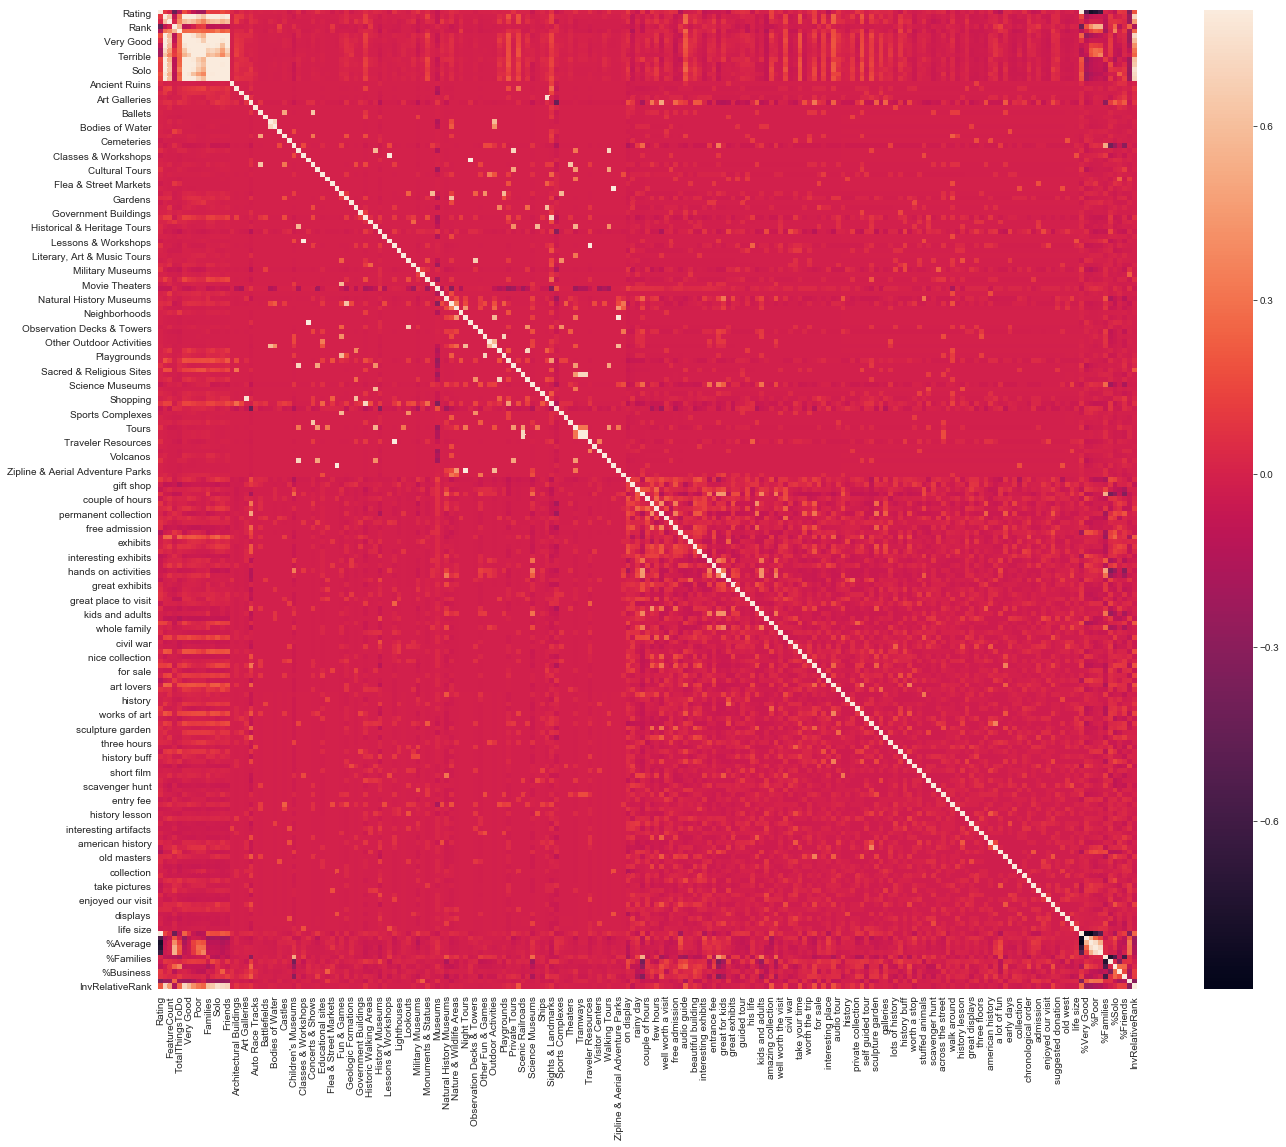

In [18]:
# heatmap

corrmat = df_corr
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corrmat, vmax=.8, square=True)

plt.show()

There are too many points in this map to make much sense of it, but it shows that overall there may be some correlations between museum types/tags and traveler type/rating percentages. There also seem to be some museum categories that are highly correlated, as well as certain tags. It is also likely that the number of reviews and travelers per review and traveler type don't really add much value to the analysis, and the percentages should be focused on instead.

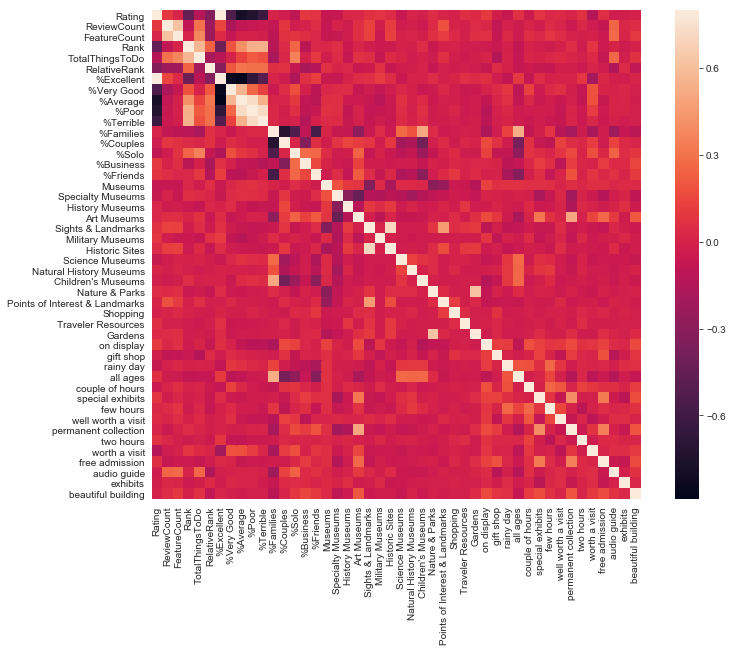

In [19]:
# zoomed heatmap

# subset dataframe because too many columns for interpretable heat map all in one
# select basic info, rating and traveler type ratios, top 15 categories, top 15 tags
selection_list = list(df.loc[:,'Rating':'TotalThingsToDo'].columns) + ['RelativeRank'] + reviews_percent + travelers_percent + top15categories + top15tags
corrmat2 = df_corr.loc[selection_list,selection_list]

# plot heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2, vmax=.8, square=True)

plt.show()

From this subset of the correlation data, we can start to see a few trends. For example, museum types and tags that are positively correlated with families appear to be negatively correlated with other traveler types, especially couples. Audio guides jump out as being correlated with review and feature counts, and solo travelers may prefer to go where there are most total things to do.

Correlation:               ReviewCount  FeatureCount
ReviewCount          1.00          0.62
FeatureCount         0.62          1.00


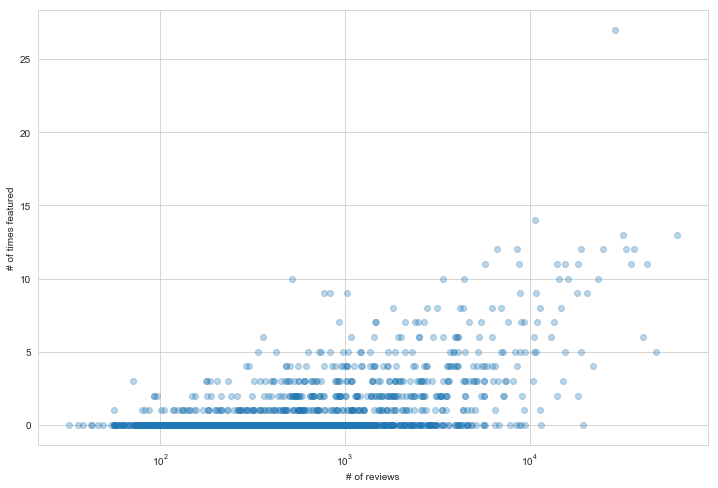

In [20]:
# ReviewCount vs FeatureCount

# correlation
print('Correlation:', df[['ReviewCount', 'FeatureCount']].corr())

# scatter plot
plt.figure(figsize=(12,8))
plt.xlabel('# of reviews')
plt.ylabel('# of times featured')

plt.scatter(df['ReviewCount'], df['FeatureCount'], alpha=0.3)
plt.xscale('log')
plt.show()

The number of reviews shows a relatively strong correlation with the number of times a museum is featured. This may indicate that being featured increases museum attendance, but may also be a result of more popular museums being more likely to be featured.

## Business Perspective

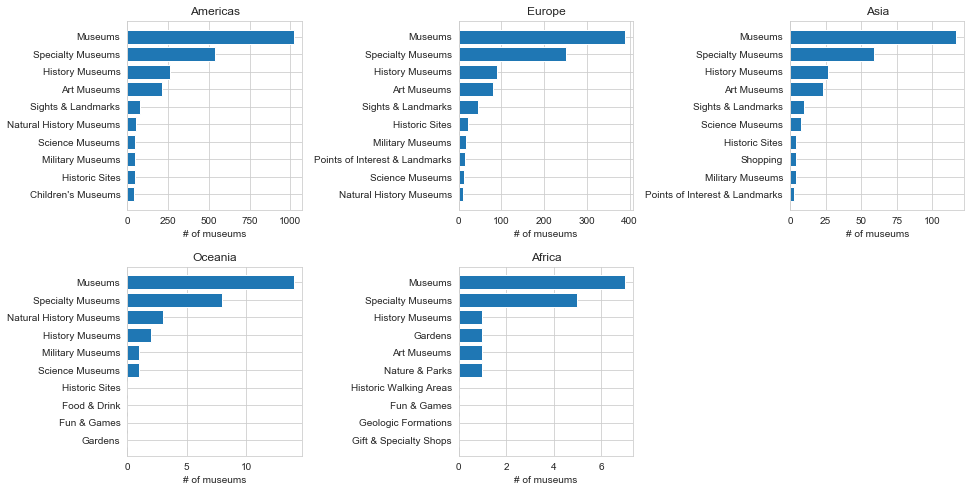

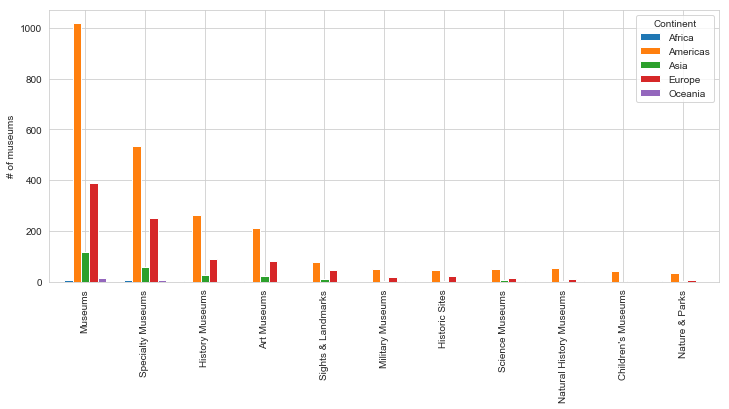

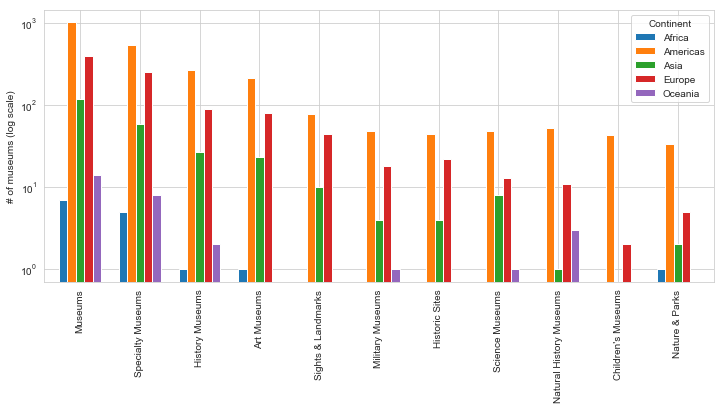

In [21]:
# What are the most common museum types per region?

# bar charts per continent
plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.3, wspace=0.9)

for i, continent in enumerate(df['Continent'].unique()):
    plt.subplot(2,3,i+1)
    labels = list(df.loc[df['Continent']==continent,first_category:last_category].sum().sort_values(ascending=False).head(10).index)
    values = df.loc[df['Continent']==continent,first_category:last_category].sum().sort_values(ascending=False).head(10).values
    
    plt.barh(labels,values)
    plt.gca().invert_yaxis()
    plt.title(continent)
    plt.xlabel('# of museums')

plt.show()

# show together on one chart for relative comparison
df_group=df.groupby(['Continent'])[top15categories[:11]].sum().T

# bar chart
df_group.plot(kind='bar', figsize =(12,5), width=0.7)
plt.ylabel('# of museums')
plt.show()

# bar char log scale
df_group.plot(kind='bar',figsize=(12,5), width=0.7)
plt.yscale('log')
plt.ylabel('# of museums (log scale)')
plt.show()

The first set of charts shows that the proportionate distribution of top museum types is quite similar per region (though at very different scales). The second set shows them side by side: the first to highlight the sheer number in the Americas (i.e. US) compared to other regions, and the second on a log scale to show the detail. 'Museums' here is representative of total museums, and we see in general that about half are considered specialty museums, then from there in general history and art museums are most common. The Americas proportionately more nature and parks attractions, as well as children's museums. Asia has proportionately few natural history museums, but more science museums, whereas Oceania (i.e. Australia and New Zealand) has proportionately more natural history museums.

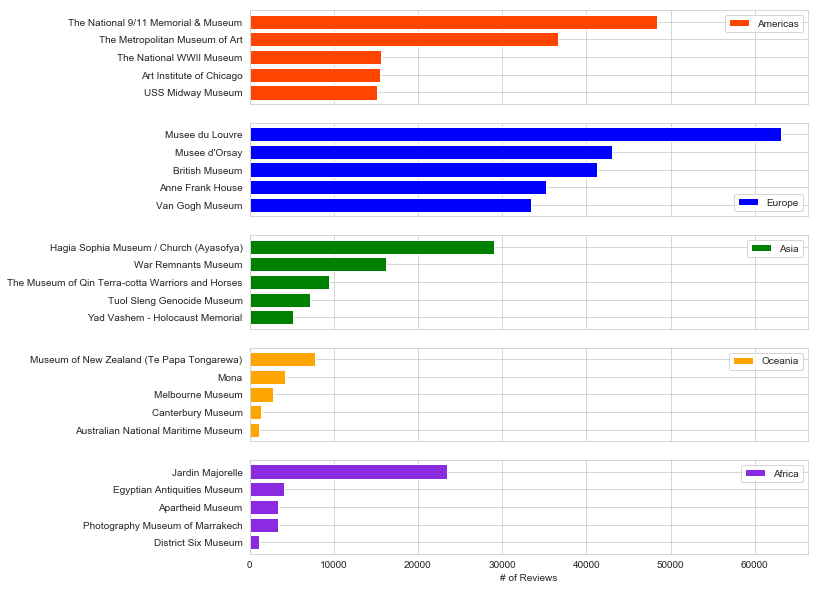

In [22]:
# What are the most-reviewed (i.e. likely the most-visited) museums per region?

# get set of 5 most-reviewed museums for each region
df_group = df.set_index('MuseumName').groupby('Continent')['ReviewCount'].nlargest(5).unstack(level=0).fillna(0)

# bar plot by region
plt.figure(figsize=(10,10))
colors=['orangered','blue','green','orange','blueviolet']

for i, continent in enumerate(df['Continent'].unique()):
    if i==0:
        ax=plt.subplot(5,1,i+1)
    else:    
        plt.subplot(5,1,i+1, sharex=ax)
    df_group[df_group[continent]>0][continent].sort_values().plot(kind='barh', width=0.8, stacked=True, color=colors[i])
    plt.ylabel('')
    plt.legend()

plt.xlabel('# of Reviews')
plt.show()    

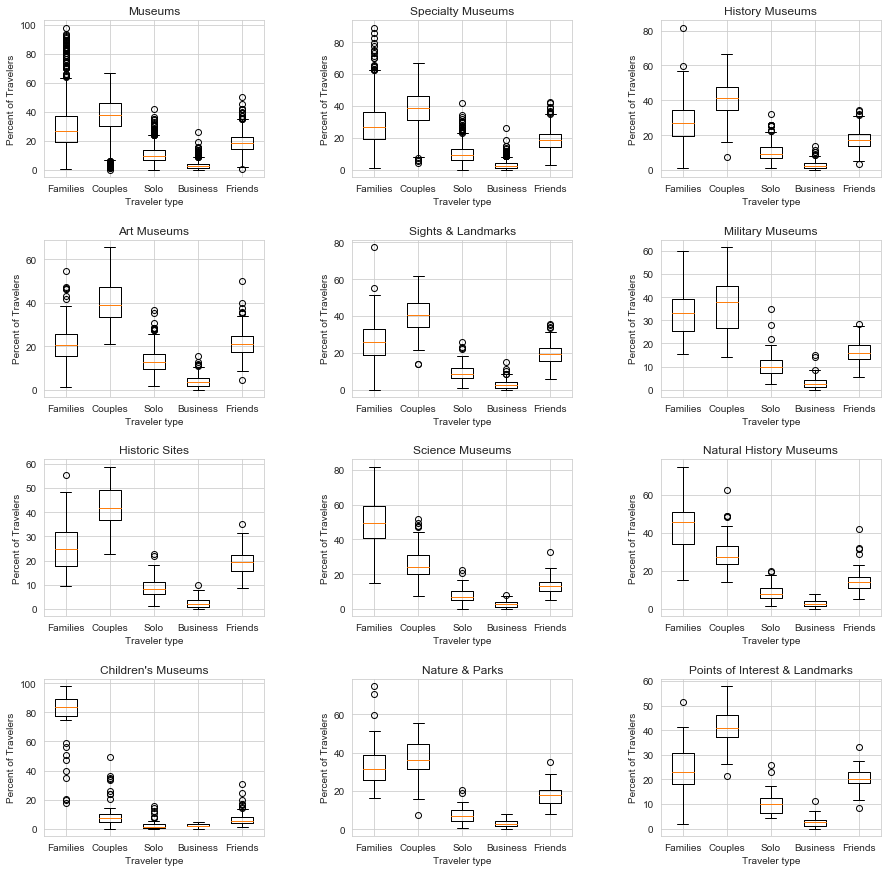

In [23]:
# What types of travelers visit the most common museum types?
values = []

plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.4,hspace=0.4)

for i, category in enumerate(top15categories[:12]):
    values = []
    for traveler in travelers_percent:
        values.append(list(df[df[category]==True][traveler].values))
    plt.subplot(4,3,(i+1))
    plt.boxplot(values)
    plt.xticks(range(1,6), travelers)
    plt.ylabel('Percent of Travelers')
    plt.xlabel('Traveler type')
    plt.title(category)

plt.show()

The data shows that the museums with the top most reviews in general are in Europe, as well as the 911 museum and MOMA in the US. This likely means they are also some of the most visited.

Here we can see that the majority of travelers are families and couples, and they have a tendency to visit opposite types of museums. Mostly families visit children's museums, which is not surprising.

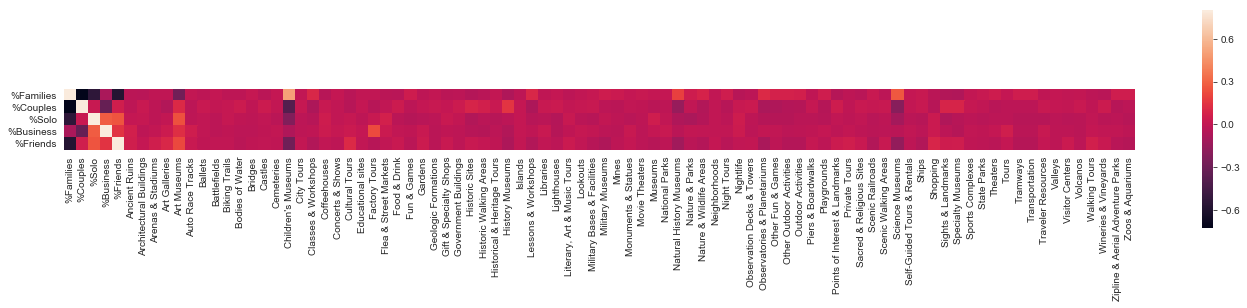

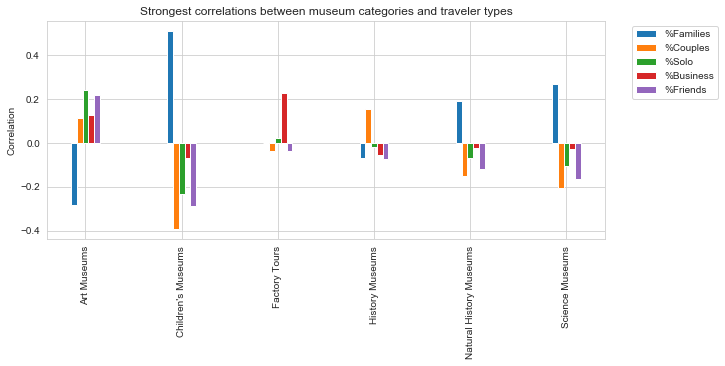

In [24]:
# Is museum category a good indicator of traveler type?

corr_list = travelers_percent + list(df.loc[:,first_category:last_category].columns)
df_category_corr=df.loc[:,corr_list].corr()

# heat map
f, ax = plt.subplots(figsize=(24, 4))
sns.heatmap(df_category_corr.loc[travelers_percent,:], vmax=.8, square=True)
plt.show()

# get most correlated (threshold based on good number of items to visualize)
df_corr_filter = df_category_corr.loc[:,travelers_percent].drop(travelers_percent)
df_most_corr = df_corr_filter[((df_corr_filter > 0.15)|(df_corr_filter < -0.15)).any(1)]

# bar plot
df_most_corr.plot(kind='bar', figsize=(10,4), width=.3)
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
plt.ylabel('Correlation')
plt.title('Strongest correlations between museum categories and traveler types')
plt.show()

There is a strong positive correlation between families and children's museums, and a moderate negative correlation with couples. Most other correlations observed are fairly weak, but do make sense. For the most part, museums favored by families are opposite to museums favored by other traveler types, similar to the findings with tags. As an exception, history museums are preferred by solo travelers, and factory tours by business travelers.

Correlation:              ReviewCount  Rank
ReviewCount         1.00 -0.09
Rank               -0.09  1.00
Correlation:
               ReviewCount  RelativeRank
ReviewCount          1.00         -0.22
RelativeRank        -0.22          1.00

Correlation:
                  ReviewCount  InvRelativeRank
ReviewCount             1.00             0.70
InvRelativeRank         0.70             1.00



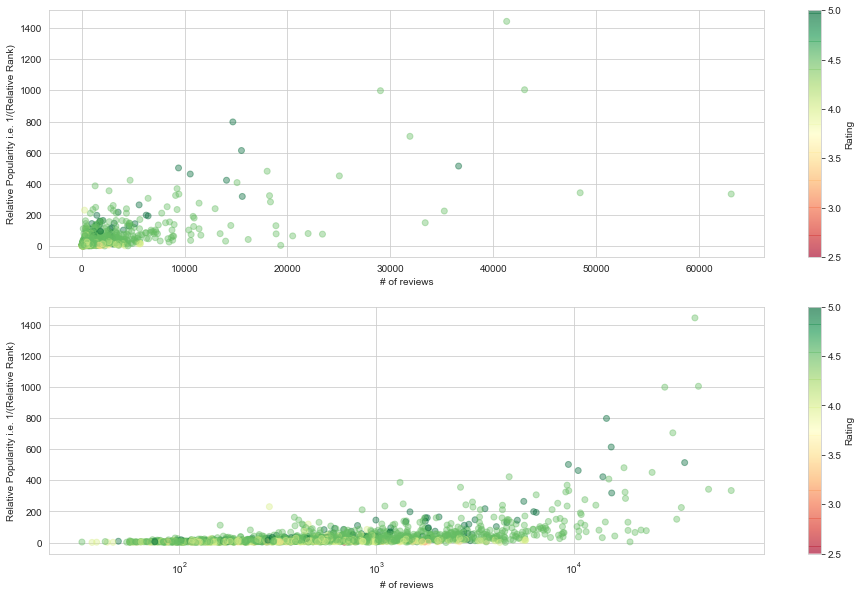

In [25]:
# Is the rank a good indicator of number of ratings? What about relative rank (i.e. accounting for the total number of things to do)

# correlation with rank
print('Correlation:', df[['ReviewCount', 'Rank']].corr())

# correlation with relative rank
print('Correlation:\n', df[['ReviewCount', 'RelativeRank']].corr())
print('')

# correlation with inverse relative rank
print('Correlation:\n', df[['ReviewCount', 'InvRelativeRank']].corr())
print('')

# scatter plot with Rating as colour
plt.figure(figsize=(16,10))
plt.subplot(211)
plt.xlabel('# of reviews')
plt.ylabel('Relative Popularity i.e. 1/(Relative Rank)')
plt.scatter(df['ReviewCount'], df['InvRelativeRank'], c=df['Rating'].values, cmap='RdYlGn', alpha=0.4)
plt.colorbar().set_label('Rating')

# log scatter plot with Rating as colour
plt.subplot(212)
plt.xlabel('# of reviews')
plt.ylabel('Relative Popularity i.e. 1/(Relative Rank)')
plt.scatter(df['ReviewCount'], df['InvRelativeRank'], c=df['Rating'].values, cmap='RdYlGn', alpha=0.4)
plt.colorbar().set_label('Rating')
plt.xscale('log')

plt.show()

There is little to no correlation between rank and number of reviews, and only a weak correlation between the relative rank and the number of reviews (where relative rank = rank/(total things to do). However, there is a strong correlation between the number of reviews, and the inverse of the relative rank (i.e. the higher a museum is ranked out of a larger number of things to do, the higher the inverse relative rank). The top plot shows this relationship clearly, but much of the data is crammed in the bottom left. The bottom plot shows the # of reviews on a log scale, to see more detail in the data with a smaller number of reviews.

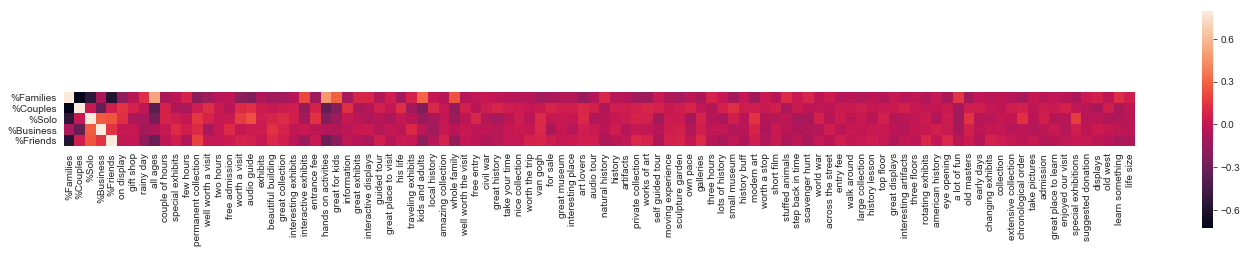

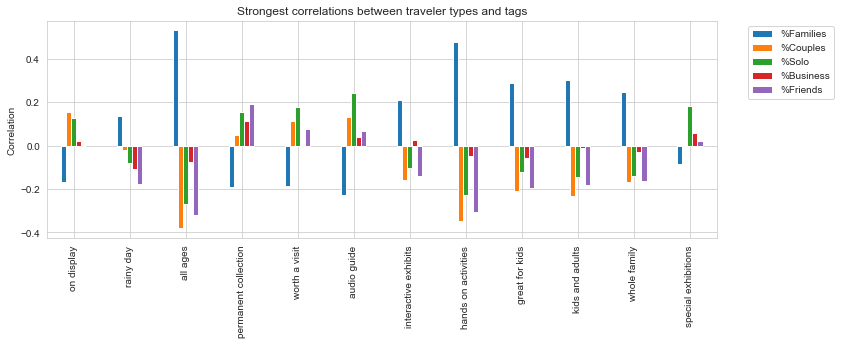

In [26]:
# Are any tags a good indicator of traveler type?

# correlation
corr_list = travelers_percent + list(df.loc[:,first_tag:last_tag].columns)
df_traveler_corr=df.loc[:,corr_list].corr()

# heat map
f, ax = plt.subplots(figsize=(24, 4))
sns.heatmap(df_traveler_corr.loc[travelers_percent,:], vmax=.8, square=True)
plt.show()

# get most correlated (threshold based on good number of items to visualize)
df_corr_filter = df_traveler_corr.loc[:,travelers_percent].drop(travelers_percent)
df_most_corr = df_corr_filter[((df_corr_filter > 0.15) | (df_corr_filter < -0.15)).any(1)]

# bar plot
df_most_corr.plot(kind='bar', figsize=(12,4), width=.45)
plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
plt.ylabel('Correlation')
plt.title('Strongest correlations between traveler types and tags')
plt.show()

The data shows that there are very few strong correlations between tags and traveler types, but there are some very weak ones. The strongest correlations are found between families and tags related to children. It is also largely clear that attributes indicative of families are opposite all other traveler types, and vice versa.

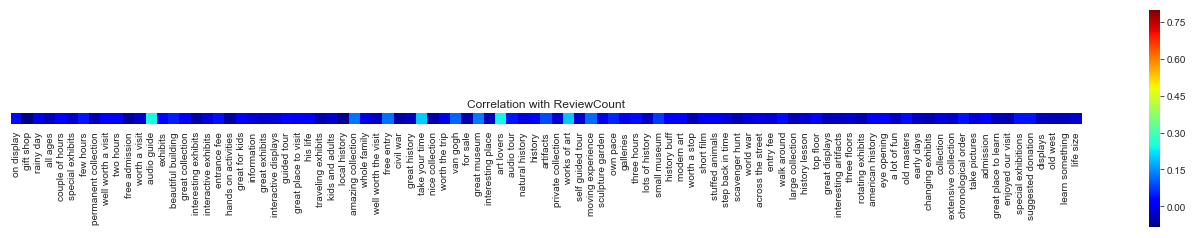

ReviewCount          1.00
audio guide          0.25
art lovers           0.24
take your time       0.20
works of art         0.20
great museum         0.13
amazing collection   0.13
free entry           0.12
moving experience    0.12
van gogh             0.11
Name: ReviewCount, dtype: float64
changing exhibits      -0.05
traveling exhibits     -0.05
for sale               -0.05
nice collection        -0.05
civil war              -0.05
hands on activities    -0.06
interesting exhibits   -0.06
free admission         -0.07
local history          -0.07
gift shop              -0.09
Name: ReviewCount, dtype: float64


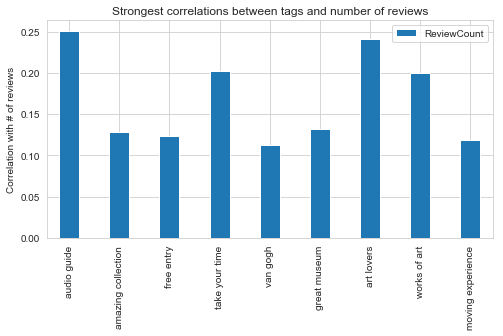

In [27]:
# Are any attributes (tags) a good indicator of popularity (based on # of reviews)?
corr_list = ['ReviewCount'] + list(df.loc[:,first_tag:last_tag].columns)
df_review_corr=df.loc[:,corr_list].corr()

# heat map
f, ax = plt.subplots(figsize=(24, 4))
sns.heatmap(df_review_corr.loc[['ReviewCount'],:].drop('ReviewCount',axis=1), vmax=.8, square=True, cmap='jet')
plt.title('Correlation with ReviewCount')
plt.yticks([])

plt.show()

# list highest and lowest correlations
print(df_review_corr['ReviewCount'].sort_values(ascending=False).drop_duplicates().head(10))
print(df_review_corr['ReviewCount'].sort_values(ascending=False).drop_duplicates().tail(10))

# get most correlated (threshold based on good number of items to visualize)
df_corr_filter = df_review_corr.loc[['ReviewCount'],:].drop('ReviewCount',axis=1).T
df_most_corr = df_corr_filter[((df_corr_filter > 0.1) | (df_corr_filter < -0.1)).any(1)]

# bar plot
df_most_corr.plot(kind='bar', figsize=(8,4), width=.4)
plt.ylabel('Correlation with # of reviews')
plt.title('Strongest correlations between tags and number of reviews')
plt.show()

Audio guides and art lovers are the attributes that are the best indicators of review count, however they are only weak indicators. Other weak indicators are related to art and a good experience. Free entry and free admission are really the same thing, so a future opportunity would be to combine tags with the same meaning and observe the impact on correlation.